In [4]:
import zipfile

with zipfile.ZipFile('f1.zip', 'r') as zip_ref:
    zip_ref.extractall('formula1')  # This will extract files into a folder named "formula1"


In [2]:
!pip install pandas


  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    --------------------------------------- 0.3/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 1.2 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/12.9 MB 1.3 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/12.9 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.3/12.9 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.9 MB 1.3 MB/s eta 0:00:09
   ----- ---------------------------------- 1.8/12.9 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.9 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.9 MB

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
import pandas as pd
pitstops = pd.read_csv("formula1/pitStops.csv")


In [7]:
import pandas as pd

drivers = pd.read_csv("formula1/drivers.csv", encoding='latin1')



In [1]:
import pandas as pd

# Load datasets
pitstops = pd.read_csv("formula1/pitStops.csv")
drivers = pd.read_csv("formula1/drivers.csv", encoding='latin1')
races = pd.read_csv("formula1/races.csv")

# Merge pitstops with drivers
pitstops_merged = pitstops.merge(drivers, on='driverId')

# Merge with race info
pitstops_merged = pitstops_merged.merge(races[['raceId', 'year', 'name']], on='raceId')

# Convert milliseconds to seconds for easier reading
pitstops_merged['duration_sec'] = pitstops_merged['milliseconds'] / 1000

# Preview data
pitstops_merged[['driverId', 'forename', 'surname', 'year', 'name', 'stop', 'lap', 'duration_sec']].head()


,driverId,forename,surname,year,name,stop,lap,duration_sec
0,153,Jaime,Alguersuari,2011,Australian Grand Prix,1,1,26.898
1,30,Michael,Schumacher,2011,Australian Grand Prix,1,1,25.021
2,17,Mark,Webber,2011,Australian Grand Prix,1,11,23.426
3,4,Fernando,Alonso,2011,Australian Grand Prix,1,12,23.251
4,13,Felipe,Massa,2011,Australian Grand Prix,1,13,23.842


In [2]:
fastest_stops = pitstops_merged.sort_values(by='duration_sec').head(10)
fastest_stops[['forename', 'surname', 'year', 'name', 'stop', 'lap', 'duration_sec']]


,forename,surname,year,name,stop,lap,duration_sec
1037,Pastor,Maldonado,2011,Abu Dhabi Grand Prix,2,30,12.897
1044,Bruno,Senna,2011,Abu Dhabi Grand Prix,3,36,12.959
693,Lewis,Hamilton,2011,Hungarian Grand Prix,6,56,13.173
632,Pastor,Maldonado,2011,Hungarian Grand Prix,2,16,13.186
1640,Michael,Schumacher,2012,Hungarian Grand Prix,2,4,13.199
655,Sergio,PÌ©rez,2011,Hungarian Grand Prix,3,32,13.201
1692,Pastor,Maldonado,2012,Hungarian Grand Prix,3,52,13.206
1399,Felipe,Massa,2012,Spanish Grand Prix,2,28,13.259
2330,Pastor,Maldonado,2013,Spanish Grand Prix,2,13,13.266
1402,Sebastian,Vettel,2012,Spanish Grand Prix,3,30,13.335


In [8]:
!pip install matplotlib



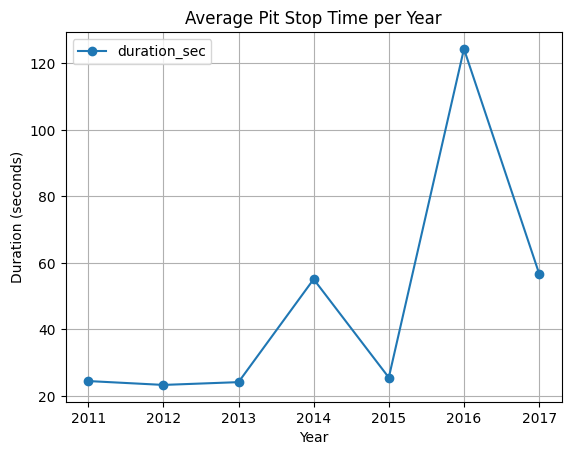

In [9]:
import matplotlib.pyplot as plt

avg_year_stops = (
    pitstops_merged
    .groupby('year')['duration_sec']
    .mean()
    .reset_index()
)

avg_year_stops.plot(x='year', y='duration_sec', kind='line', marker='o', title='Average Pit Stop Time per Year')
plt.ylabel('Duration (seconds)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


In [10]:
avg_duration_driver = (
    pitstops_merged
    .groupby(['driverId', 'forename', 'surname'])['duration_sec']
    .mean()
    .reset_index()
    .sort_values('duration_sec')
)

# For 10 fastest pit stop drivers
avg_duration_driver.head(10)


,driverId,forename,surname,duration_sec
55,843,Brendon,Hartley,21.595714
54,842,Pierre,Gasly,21.918778
15,30,Michael,Schumacher,22.541644
1,2,Nick,Heidfeld,22.933320
10,17,Mark,Webber,23.556549
23,808,Vitaly,Petrov,23.694161
6,10,Timo,Glock,23.743947
19,153,Jaime,Alguersuari,23.862349
24,811,Bruno,Senna,23.938557
18,67,SÌ©bastien,Buemi,24.024317


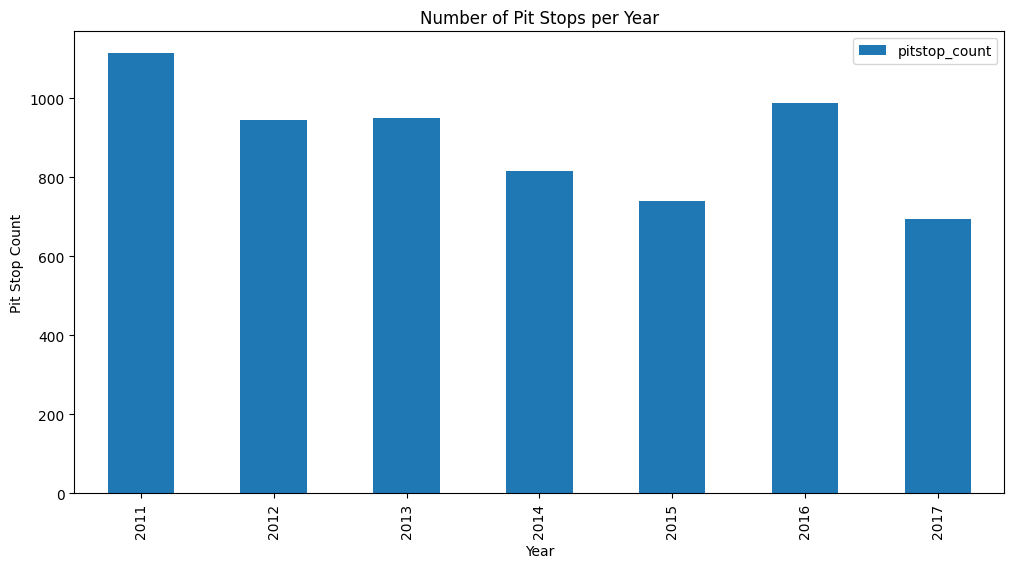

In [11]:
pitstops_per_year = pitstops_merged.groupby('year').size().reset_index(name='pitstop_count')

pitstops_per_year.plot(x='year', y='pitstop_count', kind='bar', title='Number of Pit Stops per Year', figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Pit Stop Count')
plt.show()


In [13]:
print(pitstops_merged.columns)
#merging columns

Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration', 'milliseconds',
       'driverRef', 'number', 'code', 'forename', 'surname', 'dob',
       'nationality', 'url', 'year', 'name', 'duration_sec'],
      dtype='object')


In [16]:
print(pitstops_merged_team.head())



   raceId  driverId  stop  lap      time duration  milliseconds  \
0     841       153     1    1  17:05:23   26.898         26898   
1     841        30     1    1  17:05:52   25.021         25021   
2     841        17     1   11  17:20:48   23.426         23426   
3     841         4     1   12  17:22:34   23.251         23251   
4     841        13     1   13  17:24:10   23.842         23842   

            driverRef  number code  forename      surname         dob  \
0         alguersuari     NaN  ALG     Jaime  Alguersuari  23/03/1990   
1  michael_schumacher     NaN  MSC   Michael   Schumacher  03/01/1969   
2              webber     NaN  WEB      Mark       Webber  27/08/1976   
3              alonso    14.0  ALO  Fernando       Alonso  29/07/1981   
4               massa    19.0  MAS    Felipe        Massa  25/04/1981   

  nationality                                              url  year  \
0     Spanish   http://en.wikipedia.org/wiki/Jaime_Alguersuari  2011   
1      German 

In [18]:
# Print columns after merge to see the actual column names
print(pitstops_merged_team.columns)

# After checking, suppose the column is 'name' (or 'constructorName' or similar)
# Use that column directly in groupby:

avg_duration_team = (
    pitstops_merged_team
    .groupby('name')['duration_sec']
    .mean()
    .reset_index()
    .sort_values('duration_sec')
)

print(avg_duration_team.head(10))


Index(['raceId', 'driverId', 'stop', 'lap', 'time', 'duration', 'milliseconds',
       'driverRef', 'number', 'code', 'name', 'surname', 'dob', 'nationality',
       'url', 'year', 'name_x', 'duration_sec', 'constructorId', 'name_y'],
      dtype='object')
          name  duration_sec
3      Brendon     21.595714
38      Pierre     21.918778
30     Michael     22.541644
32        Nick     22.933320
28        Mark     23.556549
49      Vitaly     23.694161
47        Timo     23.743947
14       Jaime     23.862349
4        Bruno     23.938557
46  SÌ©bastien     24.024317


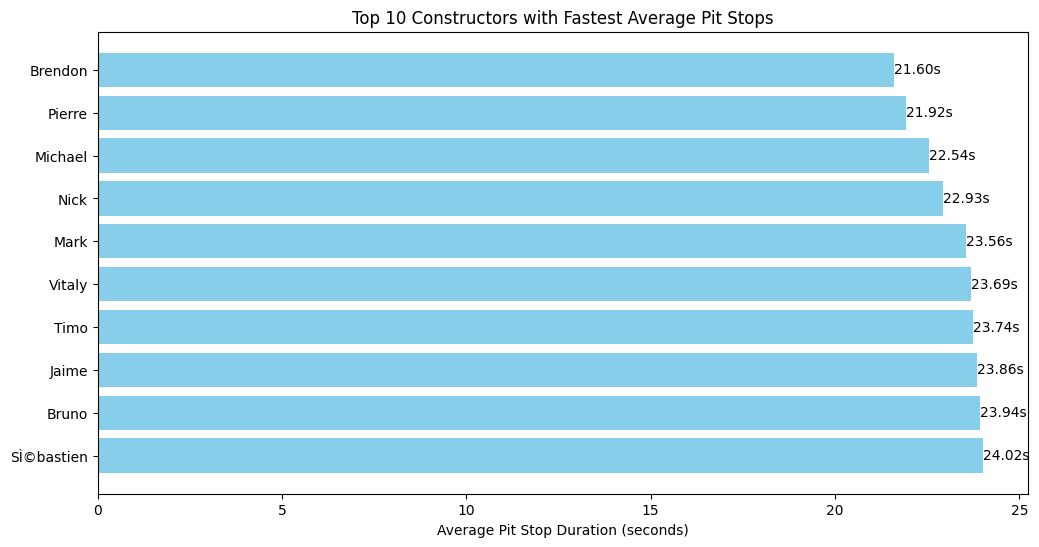

In [19]:
import matplotlib.pyplot as plt

top10 = avg_duration_team.sort_values('duration_sec').head(10)

plt.figure(figsize=(12,6))
bars = plt.barh(top10['name'], top10['duration_sec'], color='skyblue')
plt.xlabel('Average Pit Stop Duration (seconds)')
plt.title('Top 10 Constructors with Fastest Average Pit Stops')

# Annotating bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}s', va='center')

plt.gca().invert_yaxis()
plt.show()


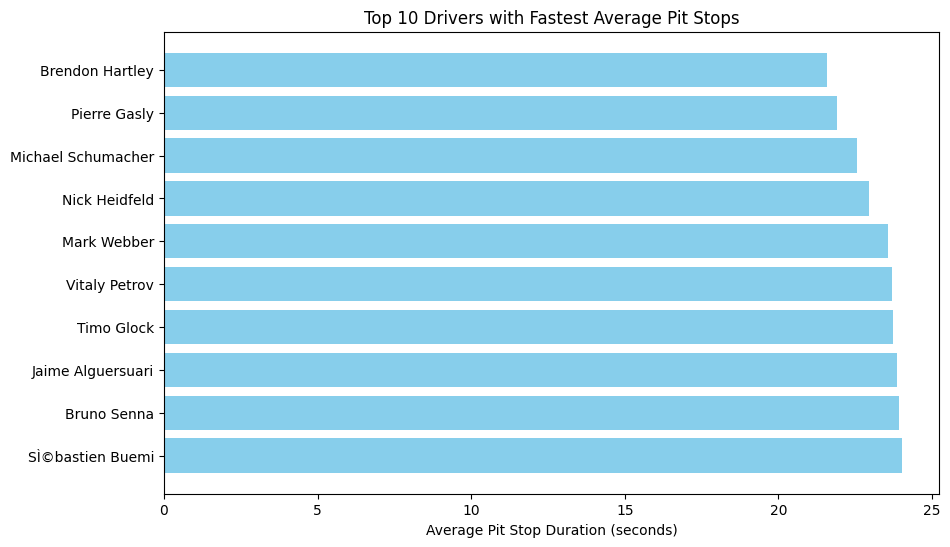

In [21]:
import matplotlib.pyplot as plt

top_10_drivers = avg_duration_driver.head(10)
plt.figure(figsize=(10,6))
plt.barh(top_10_drivers['forename'] + ' ' + top_10_drivers['surname'], top_10_drivers['duration_sec'], color='skyblue')
plt.xlabel('Average Pit Stop Duration (seconds)')
plt.title('Top 10 Drivers with Fastest Average Pit Stops')
plt.gca().invert_yaxis()
plt.show()
